In [75]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [77]:
dp=pd.read_csv(r"C:\Users\visha\OneDrive\train.csv")

In [78]:
dp.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
dp.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5903,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


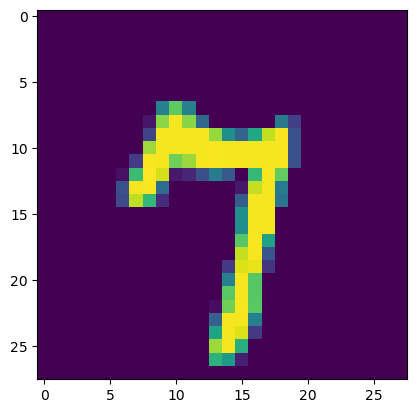

In [80]:
plt.imshow(dp.iloc[41606,1:].values.reshape(28,28))

In [81]:
x=dp.iloc[:,1:]
y=dp.iloc[:,0]

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [85]:
y_pred=knn.predict(x_test)


In [90]:
from sklearn.metrics import accuracy_score


In [92]:
accuracy_score(y_pred,y_test)

0.9648809523809524

In [95]:
from sklearn.preprocessing import StandardScaler

In [97]:
sclaer=StandardScaler()
x_train=sclaer.fit_transform(x_train)
x_test=sclaer.transform(x_test)



In [98]:
from sklearn.decomposition import PCA

In [99]:
pca=PCA(n_components=100)
x_train_trf=pca.fit_transform(x_train)
x_test_trf=pca.transform(x_test)

In [100]:
x_train_trf.shape

(33600, 100)

In [111]:
knn=KNeighborsClassifier()
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [113]:
y_pred1=knn.predict(x_test_trf)

In [115]:
accuracy_score(y_pred1,y_test)

0.9544047619047619

In [ ]:
for i in range(1,785): 
    pca=PCA(n_components=i)
    x_train_trf=pca.fit_transform(x_train)
    x_test_trf=pca.transform(x_test)

    knn=KNeighborsClassifier()
    knn.fit(x_train_trf,y_train)
    y_pred1=knn.predict(x_test_trf)
    accuracy_score(y_pred1,y_test)